# Задание:  

<b>Подготовка данных</b> 

1. Для каждого набора данных X_4_i и  Y_4_i  выбрать расстояние в R4 (интересно не только евклидово расстояние).
2. Вычислить матрицу расстояний.
3. Перейти к матрице близостей (similarity matrix) и построить графовую модель данных (полный, 
неориентированный, простой взвешенный граф).

<b>Кластеризация для числа кластеров k=2.</b> 

1. Найти разбиение каждого набора данных на 2 кластера с помощью следующих алгоритмов
    - Один (на выбор) из алгоритмов иерархической кластеризации: Threshold method=MST 
method=Single Linkage, Complete Linkage, Average Linkage, Centroid Linkage, Ward Linkage). 
Можно использовать матрицу близостей или матрицу расстояний. 
    - K-means
    - EM алгоритм
    - Spectral algorithm (использовать матрицу близостей)
2. Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса 
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату. 
3. Вычислить значение функции модулярности для каждого разбиения на 2 кластера из п.1.
4. Сделать общие выводы по возможности разбиения на 2 кластера каждого набора данных.

<b>Кластеризация для числа кластеров k=3.</b>

1. Найти разбиение каждого набора данных на 3 кластера с помощью следующих алгоритмов
    - Один (на выбор) из алгоритмов иерархической кластеризации: Threshold method=MST 
method=Single Linkage, Complete Linkage, Average Linkage, Centroid Linkage, Ward Linkage). 
Можно использовать матрицу близостей или матрицу расстояний. 
    - K-means
    - EM алгоритм
    - Spectral algorithm (использовать матрицу близостей)
2. Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса 
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату. 
3. Вычислить значение функции модулярности для каждого разбиения на 3 кластера из п.1.
4. Сделать общие выводы по возможности разбиения на 3 кластера каждого набора данных.

<b>Общий случай.</b>

1. Предложите (или найдите готовый) способ определения возможного числа кластеров в данных. 
Примените этот способ к каждому из заданных наборов данный. Сравните с вашими 
результатами в п.4 для k=2 и п.4 для k=3
2. Предложите (или найдите в литературе) какой-либо другой критерий качества кластеризации 
(отличный от модулярности). Сравните разбиения п.1 для k=2 и п.1 для k=3 по этому критерию. Дайте 
комментарий, как это согласуется с вашими выводами п.4 для k=2 и п.4 для k=3. 

# Настройки/Гиперпараметры/Импорты

In [ ]:
# !pip install scikit-network

In [106]:
import pandas as pd # для удобной работы с датасетом
import numpy as np # для работы с матрицами
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns

from scipy.spatial import distance_matrix # для подсчёта матрицы расстояний
from scipy.spatial.distance import pdist, euclidean, squareform # для подсчёта матрицы близости
import math # для экспоненты, нужной при подсчёте матрицы близости (similarity matrix)

import networkx as nx # для построения графов

from sklearn.cluster import KMeans # для k-means кластеризации
from sklearn.mixture import GaussianMixture # для EM алгоритма
from sklearn.cluster import SpectralClustering # для спектральной кластеризации

from sklearn.metrics import rand_score # для оценивания схожести разбиений, полученных разными методами кластеризации
from sknetwork.clustering import get_modularity # метрика для оценивания качества кластеризации (модулярность)
from sklearn.metrics import silhouette_score # метрика для оценки качества кластеризации (Коэффициент силуэта)

from scipy.cluster.hierarchy import dendrogram, linkage # для построения дендрограммы (определения оптимального числа кластеров)

# Подготовка данных

## 1) Для каждого набора данных X_4_i и  Y_4_i  выбрать расстояние в R4 (интересно не только евклидово расстояние)

### Считывание данных

In [3]:
data_X = pd.read_excel("data/X_4_7.xlsx", header=None) # считывание данных (header=None и names у столбцов не указаны)
data_X

,0,1,2,3
0,6.094072,0.979054,9.250983,-3.156911
1,5.391045,1.135927,7.374308,-1.983263
2,6.385765,1.305806,8.854114,-2.468348
3,6.335869,1.179604,9.132927,-2.797057
4,5.168517,1.149131,6.889641,-1.721123
...,...,...,...,...
195,5.429264,0.738726,8.642351,-3.213086
196,4.947268,0.942908,7.065810,-2.118542
197,5.222540,1.100263,7.144292,-1.921752
198,5.697541,0.821102,8.931776,-3.234235


In [4]:
data_Y = pd.read_excel("data/Y_4_7.xlsx", header=None) # считывание данных (header=None и names у столбцов не указаны)
data_Y

,0,1,2,3
0,1.184510,-0.198632,0.007512,0.934323
1,1.251354,1.105809,0.876704,1.054843
2,0.889759,0.936681,0.888572,1.032600
3,1.967415,0.972046,2.232605,1.080803
4,1.941719,0.918258,2.275368,1.096889
...,...,...,...,...
195,1.940032,0.839706,2.208311,1.123023
196,1.122016,0.941229,0.790261,1.400988
197,2.135315,1.003128,2.134173,0.919275
198,1.224102,-0.227992,-0.015723,1.001589


### Попытка визуализации данных

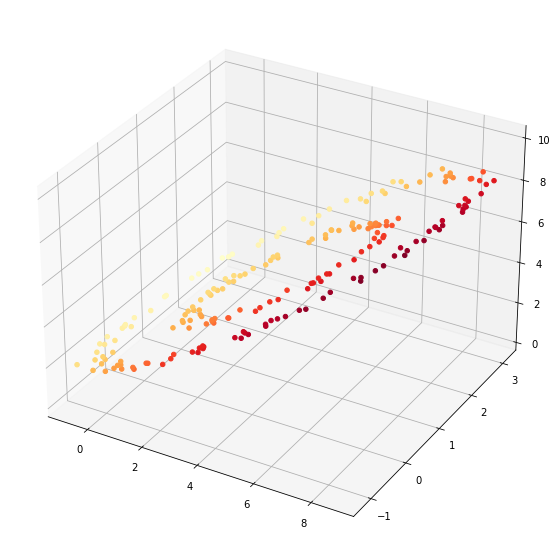

In [5]:
plt.figure(figsize=(10.00, 10.00)) # задаём размер графика
ax = plt.axes(projection ="3d") # создаём оси для 3d вывода
x = data_X[0] # первая координата (x)
y = data_X[1] # вторая координата (y)
z = data_X[2] # третья координата (z)
c = data_X[3] # четвёртая координата (цвет)
ax.scatter(x, y, z, c=c, cmap='YlOrRd', alpha=1) # строим точки в "четырёхмерном" пространстве (cmap - используемаяцветовая схема, alpha=1 отвечает за непрозрачность)
plt.show() # вывод графика

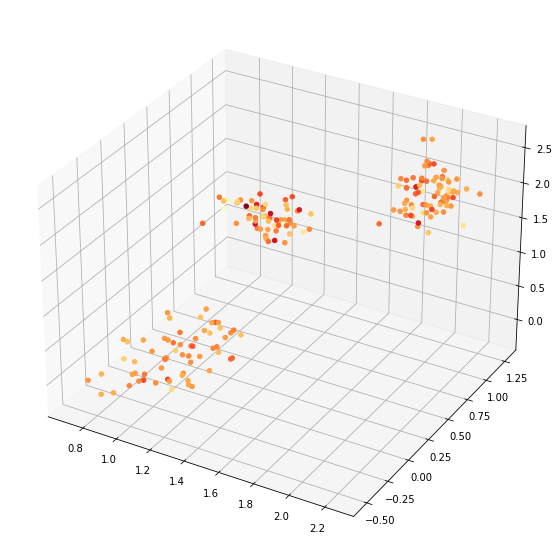

In [6]:
plt.figure(figsize=(10.00, 10.00)) # задаём размер графика
ax  = plt.axes(projection ="3d") # создаём оси для 3d вывода
x = data_Y[0] # первая координата (x)
y = data_Y[1] # вторая координата (y)
z = data_Y[2] # третья координата (z)
c = data_Y[3] # четвёртая координата (цвет)
ax.scatter(x, y, z, c=c, cmap='YlOrRd', alpha=1) # строим точки в "четырёхмерном" пространстве (cmap - используемаяцветовая схема, alpha=1 отвечает за непрозрачность)
plt.show() # вывод графика

## 2) Вычислить матрицу расстояний

В качестве рассматриваемого расстояния будем использовать Евклидово расстояние.

$$
dist_{Eucl}(x, y) = \sqrt{\sum_{i=1}^{m}(x_i-y_i)^2},\ где\newline
x_i\ и\ y_i\ —\ значения\ i-го\ признака\ объектов\ x\ и\ y
$$

In [7]:
distance_X = distance_matrix(data_X, data_X)
distance_X

array([[0. , 2.32770572, 0.90745525, ..., 2.59577024, 0.53856996,
 2.9116753 ],
 [2.32770572, 0. , 1.8556559 , ..., 0.29386546, 2.0454075 ,
 0.7701775 ],
 [0.90745525, 1.8556559 , 0. , ..., 2.14885968, 1.14070301,
 2.57415237],
 ...,
 [2.59577024, 0.29386546, 2.14885968, ..., 0. , 2.28500909,
 0.50662747],
 [0.53856996, 2.0454075 , 1.14070301, ..., 2.28500909, 0. ,
 2.5334381 ],
 [2.9116753 , 0.7701775 , 2.57415237, ..., 0.50662747, 2.5334381 ,
 0. ]])

In [8]:
distance_Y = distance_matrix(data_Y, data_Y)
distance_Y

array([[0. , 1.57354911, 1.47028548, ..., 2.62129323, 0.08656855,
 1.60029989],
 [1.57354911, 0. , 0.39998784, ..., 1.54646041, 1.60593618,
 0.28345597],
 [1.47028548, 0.39998784, 0. , ..., 1.76640631, 1.51226946,
 0.32217568],
 ...,
 [2.62129323, 1.54646041, 1.76640631, ..., 0. , 2.6409842 ,
 1.58667352],
 [0.08656855, 1.60593618, 1.51226946, ..., 2.6409842 , 0. ,
 1.62822713],
 [1.60029989, 0.28345597, 0.32217568, ..., 1.58667352, 1.62822713,
 0. ]])

## 3) Переход к матрице близостей (similarity matrix) и построение графовой модели данных (полный, неориентированный, простой взвешенный граф)

### Подсчёт матрицы близости

$$
similarity(x, y) = e^{-\dfrac{dist^2(x,y)}{2\sigma^2}},\ где\newline \newline
dist^2(x,y)\ —\ квадрат\ расстояния\ между\ объектами\newline
\sigma\ —\ изменяемый\ параметр
$$

In [9]:
def similarity_func(u, v, sigma=1): # функция перевода евклидового расстояния в близость
    return math.exp(-(euclidean(u, v)**2)/(2 * sigma**2))

In [10]:
similarity_X = pdist(X=data_X, metric=similarity_func) # pdist считает расстояние между объектами в X по формуле metric (но записывает ответ в одномерный массив)
similarity_X = squareform(similarity_X) # переводим близость из одномерного массива в двумерный
similarity_X

array([[0. , 0.06659625, 0.66249815, ..., 0.03442365, 0.86499738,
 0.01442307],
 [0.06659625, 0. , 0.17875674, ..., 0.95774046, 0.12345903,
 0.74335119],
 [0.66249815, 0.17875674, 0. , ..., 0.09938054, 0.52173177,
 0.03640205],
 ...,
 [0.03442365, 0.95774046, 0.09938054, ..., 0. , 0.07348799,
 0.87955806],
 [0.86499738, 0.12345903, 0.52173177, ..., 0.07348799, 0. ,
 0.04039076],
 [0.01442307, 0.74335119, 0.03640205, ..., 0.87955806, 0.04039076,
 0. ]])

In [11]:
similarity_Y = pdist(X=data_Y, metric=similarity_func) # pdist считает расстояние между объектами в X по формуле metric (но записывает ответ в одномерный массив)
similarity_Y = squareform(similarity_Y) # переводим близость из одномерного массива в двумерный
similarity_Y

array([[0. , 0.28995533, 0.33930031, ..., 0.03220643, 0.99625995,
 0.27790391],
 [0.28995533, 0. , 0.92312084, ..., 0.30247099, 0.27540418,
 0.96062262],
 [0.33930031, 0.92312084, 0. , ..., 0.21011598, 0.31870816,
 0.94942515],
 ...,
 [0.03220643, 0.30247099, 0.21011598, ..., 0. , 0.03058031,
 0.28400415],
 [0.99625995, 0.27540418, 0.31870816, ..., 0.03058031, 0. ,
 0.26565367],
 [0.27790391, 0.96062262, 0.94942515, ..., 0.28400415, 0.26565367,
 0. ]])

### Построение графовой модели

In [12]:
def print_graph(adj_matrix: np.array, clusters: list=[], threshold: float=0.0, circular_layout: bool=True, colors: list=["blue", "green", "red", "yellow", "purple"], random_state: int=42) -> None:
    """
    функция для построения графа.\n
    Parameters:
        * adj_matrix: матрица смежности
        * clusters: массив с указанием, к какому кластеру принадлежит вершина, например array([0,1,0,1]) говорит, что вершина 0 и 2 принадлежат к кластеру 0, 1 и 3 - кластеру 1
        * threshold: порог веса для рёбер (<= рёбра не строятся)
        * circular_layout: располагать ли вершины графика как на "круговой" области
        * colors: используемые цвета для окраски вершин кластеров (их должно быть не меньше числа кластеров в clusters)
        * random_state: случайное число для отображения графа (положение вершин в пространстве; используется если circular_layout=False)\n
    Returns:
        * None (выводит график)
    """

    plt.figure(figsize=(10,10)) # задание размера графика

    adj_matrix_ = adj_matrix.copy() # копируем данные, чтобы преобразования проводить над копией, а не над оригиналом
    adj_matrix_[adj_matrix_ <= threshold] = 0.0 # удаляем рёбра (занулив их вес), если их вес меньше порога
    
    G = nx.from_numpy_array(adj_matrix_) # создаём объект графа из списка смежности

    if len(clusters) != 0: # если передали кластеры, то пытаемся расскрасить вершины в соответствующие их кластерам цвета
        color_map = [] # заготовка под цвета вершин в зависимости от принадлежности кластеру
        for node in clusters: # идём по "вершинам" (номерам кластеров, к которм принадлежит вершина)
            color_map.append(colors[node]) # добавляем соответствующий кластеру цвет для рассматриваемой вершины
    else: # иначе — все вершины синего цвета
        color_map = "#1f78b4"
 
    if circular_layout: # каким образом располагать вершины на графике
        pos = nx.circular_layout(G) # задание позиций вершин графа для графика (на "круговой" области)
    else:
        pos = nx.spring_layout(G, seed=random_state) # случайное задание позиций вершин графа для графика (seed задаёт расположение вершин на графике)

    nx.draw_networkx(G, pos, width=1, node_color=color_map, with_labels=True) # построение графа, pos - позиции вершин графа, width - ширина ребра
    # labels = nx.get_edge_attributes(G, name='weight') # взятие атрибутов рёбер (веса) и запись его в переменную labels (будет идти названием ребёр)
    # with_labels - подписывать ли номер вершины
    # node_color - цвета вершин
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) # добавление подписей (веса) на рёбра

    plt.show() # вывод графа

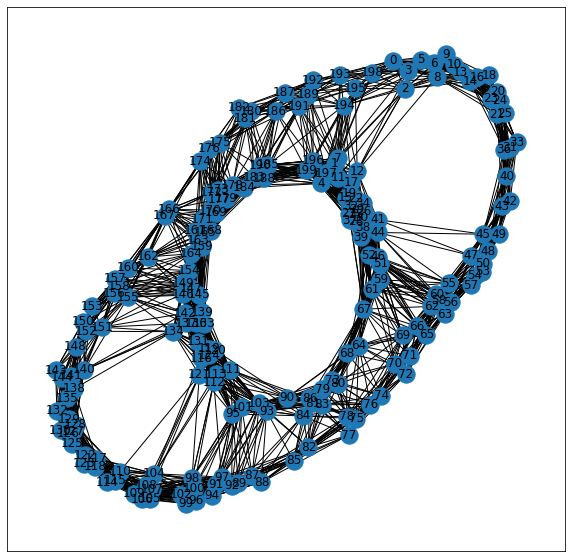

In [13]:
print_graph(similarity_X, threshold=0.1, circular_layout=False, random_state=5)

Если поставить порог в 0.1 для веса рёбер графа, то уже можно заметить возможное разбиение на 2 кластера (в виде окружности) данных X.

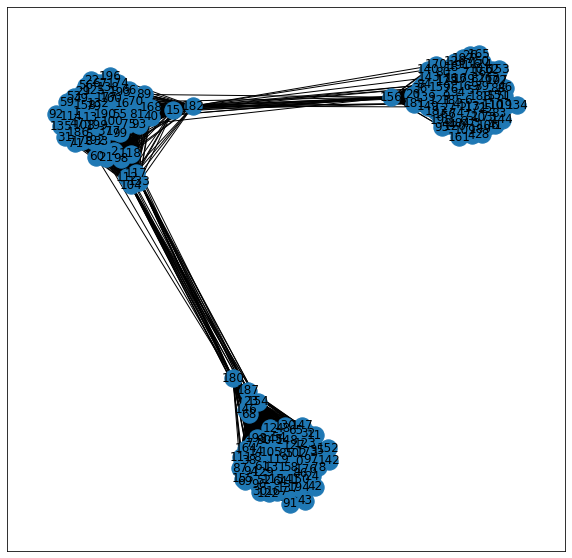

In [14]:
print_graph(similarity_Y, threshold=0.65, circular_layout=False, random_state=42)

Если поставить порог в 0.65 для веса рёбер графа, то уже можно заметить возможное разбиение на 3 кластера данных Y.
При порогах меньше — кластеры всё ещё сильно связаны, что может свидетельствовать о высокой схожести объектов в Y.

# Кластеризация для числа кластеров k=2.

## 1) Найти разбиение каждого набора данных на 2 кластера с помощью следующих алгоритмов

- Один (на выбор) из алгоритмов иерархической кластеризации: Threshold method=MST method=Single Linkage, Complete Linkage, Average Linkage, Centroid Linkage, Ward Linkage). Можно использовать матрицу близостей или матрицу расстояний.
- K-means
- EM алгоритм
- Spectral algorithm (использовать матрицу близостей)

In [15]:
# заготовки под кластера
clusters_X = {2:
                  {"Threshold method": None,
                   "K-means": None,
                   "EM algorithm": None, 
                   "Spectral algorithm": None}, 
              3:
                  {"Threshold method": None, 
                   "k-means": None,
                   "EM algorithm": None,
                   "Spectral algorithm": None}}

# аналогично для данных из Y
clusters_Y = {2:
                  {"Threshold method": None, 
                   "K-means": None, 
                   "EM algorithm": None, 
                   "Spectral algorithm": None}, 
              3:
                  {"Threshold method": None, 
                   "k-means": None, 
                   "EM algorithm": None, 
                   "Spectral algorithm": None}}

### - Threshold method:

In [16]:
def threshold(adj_matrix: np.array, clusters_num: np.int16) -> np.ndarray:
    """
    Метод отсечений для нахождения разбиения данных на ожидаемое число кластеров.\n
    Parameters:
        * adj_matrix: матрица схожести или расстояний между объектами (рассматривается как матрица смежности)
        * clusters_num: на сколько кластеров пытаться разбить данные\n
    Returns:
        # * list: состав кластеров в формате [[состав_кластера_1], ..., [состав_кластера_clusters_num]]
        * np.ndarray: список вершин с указанием кластера, к которому они принадлежат вида [кластер_для_вершины_1, ..., кластер_для_вершины_N]
    """
    thresholds = np.unique(adj_matrix) # находим все уникальные значения порогов (+ автоматически сортируем в порядке увеличения)

    if adj_matrix.shape[0] < clusters_num: # проверка, что вершин в графе меньше числа кластеров
        print("Warning: the matrix has fewer vertices than the expected number of clusters") # предупреждение о возможном числе кластеров
        #========== v1
        # return [[cluster] for cluster in range(adj_matrix.shape[0])] # возвращаем максимальное возможное число кластеров — каждый кластер из одного элемента
        #========== v2
        return np.array([i for i in range(adj_matrix.shape[0])]) # каждая вершина - уникальный кластер
        #==========

    # используем бинарный поиск для нахождения порога нужного разбиения
    left = 0 # левая граница
    right = thresholds.shape[0]-1 # правая граница
    while True:
        if left > right: 
            raise Exception("Error: the matrix has fewer vertices than the expected number of clusters") # нет желаемого разбиения
        m = int((left + right) / 2) # берём средний элемент (с округлением влево)
        adj_matrix_ = adj_matrix.copy() # копируем данные, чтобы преобразования проводить над копией, а не над оригиналом
        adj_matrix_[adj_matrix_<=thresholds[m]] = 0.0 # удаляем те рёбра, что меньше или равны рассматриваемому порогу (в цикле, так как алгоритм иерархический)
        num_connected_components = nx.number_connected_components(nx.from_numpy_array(adj_matrix_)) # число компонент связности в графе (создаём объект графа из списка смежности - from_numpy_array(adj_matrix_))

        if num_connected_components < clusters_num: # если число получившихся кластеров слишком мало
            left = m + 1 # сдвигаем левую границу на середину (+1 так как середина уже рассмотрена)
        if num_connected_components > clusters_num: # если число получившихся кластеров слишком велико
            right = m - 1 # сдвигаем правую границу на середину (-1 так как середина уже рассмотрена)
        if num_connected_components == clusters_num: # если нашли разбиение на нужное число кластеров - выходим из цикла
            clusters = nx.connected_components(nx.from_numpy_array(adj_matrix_)) # создаём объект графа из списка смежности - from_numpy_array(adj_matrix_) и берём его компоненты связности (пока в виде генератора) - connected_components
            #========== v1
            # clusters = [list(cluster) for cluster in clusters] # преобразуем генератор в список списков кластеров
            # return clusters
            #========== v2
            res = np.zeros(shape=(adj_matrix.shape[0]), dtype=np.int32) # заготовка под ответ
            for cluster_num, cluster in enumerate(clusters): # идём по полученным кластерам
                for element in cluster: # идём по вершинам в рассматриваемом кластере cluster_num
                    res[element] = cluster_num # ставим вершине номер её соответствующего кластера
            #==========
            return res

In [17]:
# считаем кластера по методу отсечений
clusters_X[2]["Threshold method"] = threshold(adj_matrix=similarity_X, clusters_num=2)

# аналогично для данных из Y
clusters_Y[2]["Threshold method"] = threshold(adj_matrix=similarity_Y, clusters_num=2)

In [18]:
clusters_X[2]["Threshold method"] # пример разбиения данных X на два кластера методом отсечений

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
 0, 1], dtype=int32)

### - K-means

In [21]:
# обучение K-means моделей
clusters_X[2]["K-means"] = KMeans(n_clusters=2, # ожидаемое число кластеров
                                  max_iter=300, # максимальное число итераций K-means для одного запуска
                                  random_state=0, # случайное число для инициализации центроидов (centroid)
                                  n_init="auto" # число запусков k-means с различными centroid seeds для нахождения лучшего
                                 ).fit_predict(data_X) # обучаем на данных и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[2]["K-means"] = KMeans(n_clusters=2, # ожидаемое число кластеров
                                  max_iter=300, # максимальное число итераций K-means для одного запуска
                                  random_state=0, # случайное число для инициализации центроидов (centroid)
                                  n_init="auto" # число запусков k-means с различными centroid seeds для нахождения лучшего
                                 ).fit_predict(data_Y) # обучаем на данных и предсказываем их кластера

In [22]:
clusters_X[2]["K-means"] # пример разбиения данных X на два кластера методом K-means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0], dtype=int32)

### - EM алгоритм

In [25]:
# обучение EM моделей
clusters_X[2]["EM algorithm"] = GaussianMixture(n_components=2, # ожидаемое число кластеров
                                                covariance_type="full", # тип используемых ковариационных параметров
                                                max_iter=300, # максимальное число итераций K-means для одного запуска
                                                init_params="random_from_data", # метод, используемый для инициализации весов, средних значений и точности
                                                random_state=0, # случайное число для инициализации центроидов (centroid)
                                               ).fit_predict(data_X) # обучаем на данных и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[2]["EM algorithm"] = GaussianMixture(n_components=2, # ожидаемое число кластеров
                                                covariance_type="full", # тип используемых ковариационных параметров
                                                max_iter=300, # максимальное число итераций K-means для одного запуска
                                                init_params="random_from_data", # метод, используемый для инициализации весов, средних значений и точности
                                                random_state=0, # случайное число для инициализации центроидов (centroid)
                                               ).fit_predict(data_Y) # обучаем на данных и предсказываем их кластера

In [26]:
clusters_X[2]["EM algorithm"] # пример разбиения данных X на два кластера методом EM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
 0, 1])

### - Spectral algorithm

In [29]:
# обучение Spectral моделей
clusters_X[2]["Spectral algorithm"] = SpectralClustering(n_components=2, # ожидаемое число кластеров
                                                         assign_labels='cluster_qr', # стратегия назначения меток элементам в пространстве
                                                         affinity="precomputed", # интерпретировать ли входные данные как заранее вычисленную матрицу сходства, где большие значения указывают на большее сходство между экземплярами
                                                         random_state=0, # случайное число для инициализации центроидов (centroid)
                                                        ).fit_predict(similarity_X) # обучаем на данных (матрица близости) и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[2]["Spectral algorithm"] = SpectralClustering(n_components=2, # ожидаемое число кластеров
                                                         assign_labels='cluster_qr', # стратегия назначения меток элементам в пространстве
                                                         affinity="precomputed", # интерпретировать ли входные данные как заранее вычисленную матрицу сходства, где большие значения указывают на большее сходство между экземплярами
                                                         random_state=0, # случайное число для инициализации центроидов (centroid)
                                                        ).fit_predict(similarity_Y) # обучаем на данных (матрица близости) и предсказываем их кластера

In [30]:
clusters_X[2]["Spectral algorithm"] # пример разбиения данных X на два кластера методом Spectral algorithm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1])

## 2) Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса (вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

$$
RI = \dfrac{N_{0,0} + N_{1,1}}{C_N^2},\ где\newline
N_{0,0} - число\ пар\ элементов,\ что\ находятся\ в\ одном\ кластере\ в\ разбиениях\ U\ и\ V\newline
N_{1,1} - число\ пар\ элементов,\ что\ находятся\ в\ разных\ кластерах\ в\ разбиениях\ U\ и\ V\newline
C_N^2 - число\ всех\ возможных\ пар\ элементов
$$

RAND index представляет собой частоту возникновения соответствий разбиений по общему числу пар или вероятность того, что элементы в разных разбиениях окажутся в одном кластере.

RAND index принимает значение в области *[0,1]*, где *1* - полное совпадение разбиений (кластеров), *0* - две кластеризации данных не согласуются ни по одной паре точек.

In [31]:
# создаём пустой DataFrame под значения RAND индексов (для данных из X с числом кластеров = 2)
rand_indices_2_X = pd.DataFrame(columns = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # колонки таблицы
                                index = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                                dtype=np.float64) # тип данных
                              
rand_indices_2_Y = pd.DataFrame(columns = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # колонки таблицы
                                index = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                                dtype=np.float64) # тип данных

for alg1_name in ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"]: # идём по названиям методов кластеризации (столбцам)
    for alg2_name in ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"]: # идём по названиям методов кластеризации (строкам)
        rand_indices_2_X[alg1_name][alg2_name] = rand_score(clusters_X[2][alg1_name], clusters_X[2][alg2_name]) # считаем RAND индекс для данных из X при использовании алгоритмов alg1_name и alg2_name
        rand_indices_2_Y[alg1_name][alg2_name] = rand_score(clusters_Y[2][alg1_name], clusters_Y[2][alg2_name]) # считаем RAND индекс для данных из Y при использовании алгоритмов alg1_name и alg2_name

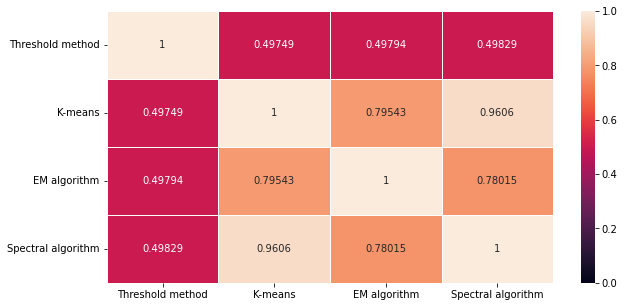

In [32]:
plt.figure(figsize=(10,5)) # задаём размер вывода
sns.heatmap(rand_indices_2_X, linewidths=1, annot=True, vmin=0, vmax=1, fmt='.5g') # делаем heatmap из таблицы
# linewidths - длина разделяющей ячейки таблицы линии 
# annot - добавление подписи в ячейку (значение RAND index)
# vmin, vmax - диапазон значений RAND index [vmin, vmax]
# fmt - число знаков после запятой у float

# plt.xticks(rotation=45, horizontalalignment='right') # поворачиваем подписи по X и выравниваем (я хотю чтобы это было туть)
plt.show() # вывод графика

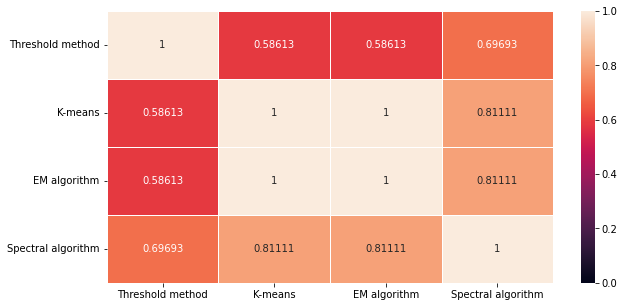

In [33]:
plt.figure(figsize=(10,5)) # задаём размер вывода
sns.heatmap(rand_indices_2_Y, linewidths=1, annot=True, vmin=0, vmax=1, fmt='.5g') # делаем heatmap из таблицы
# linewidths - длина разделяющей ячейки таблицы линии 
# annot - добавление подписи в ячейку (значение RAND index)
# vmin, vmax - диапазон значений RAND index [vmin, vmax]
# fmt - число знаков после запятой у float

# plt.xticks(rotation=45, horizontalalignment='right') # поворачиваем подписи по X и выравниваем (я хотю чтобы это было туть)
plt.show() # вывод графика

* Для X разбиение на группы, полученное с помощью метода отсечений сильно отличается от K-means, EM, Spectral кластеров (что в свою очередь, наоборот, являются схожими).
* Для Y разбиение K-means и EM алгоритма совпали, метод отсечений же значительно от них отличается, а Spectral algorithm является чем-то средним между ними.

## 3) Вычислить значение функции модулярности для каждого разбиения на 2 кластера из п.1.

$$
Modularity = \dfrac{1}{2m} \sum_{i=1}^{n} \sum_{j=1}^{n} (w_{i,j}-\dfrac{k_i k_j}{2m})\delta(i,j),\ где\newline
\delta(i,j)=
\left\{
\begin{array}{ll}
      1,\ если\ i\ и\ j\ из\ одной\ группы\ (кластера)\\
      0,\ если\ i\ и\ j\ из\ разных\ групп\ (кластеров)\\
\end{array} 
\right.\newline
S=(S_1, ..., S_k) - разбиение\ вершин\ на\ k\ групп\ (кластеров)\newline
k_i = \sum_{j=1}^{n} w_{i,j}\ —\ если\ граф\ невзвешенный,\ то\ это\ степень\ вершины\ i\newline
2m\ —\ сумма\ всех\ k_i,\ i=\overline{1,n}\ (сумма\ всех\ степеней\ вершин)\newline
w_{i,j}\ —\ элемент\ матрицы\ смежности\ (вес\ ребра\ между\ вершинами\ i\ и\ j,\ в\ невзвешенном\ графе\ это\ 0\ или\ 1)\newline
\dfrac{k_i k_j}{2m}\ —\ вероятность\ ребра\ из\ i\ в\ j\ в\ случайном\ графе
$$

Модулярность — характеристика качества кластеризации в сети, принимает значение в области *[-1/2, 1]*. Чем больше — тем лучше (но при этом модулярность не говорит о том, насколько хорошо получилось разбиение)

In [34]:
# создаём DataFrame под модулярность для X
modularity_2_X = pd.DataFrame(columns=["Modularity"], # колонки таблицы
                              index=["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                              dtype=np.float64) # тип данных

# аналогично для Y
modularity_2_Y = pd.DataFrame(columns=["Modularity"], # колонки таблицы
                              index=["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                              dtype=np.float64) # тип данных

for alg_name in modularity_2_X.index: # идём по типу алгоритма
    modularity_2_X["Modularity"][alg_name] = get_modularity(similarity_X, clusters_X[2][alg_name]) # считаем модулярность для X
    modularity_2_Y["Modularity"][alg_name] = get_modularity(similarity_Y, clusters_Y[2][alg_name]) # считаем модулярность для Y

In [35]:
modularity_2_X # модулярность для данных X при разбиении на 2 кластера

,Modularity
Threshold method,0.402375
K-means,0.439336
EM algorithm,0.419990
Spectral algorithm,0.442756


In [36]:
modularity_2_Y # модулярность для данных Y при разбиении на 2 кластера

,Modularity
Threshold method,0.222713
K-means,0.280030
EM algorithm,0.280030
Spectral algorithm,0.246657


## 4) Сделать общие выводы по возможности разбиения на 2 кластера каждого набора данных.

### Вывод получившихся разбиений на два кластера

**X: Threshold method**

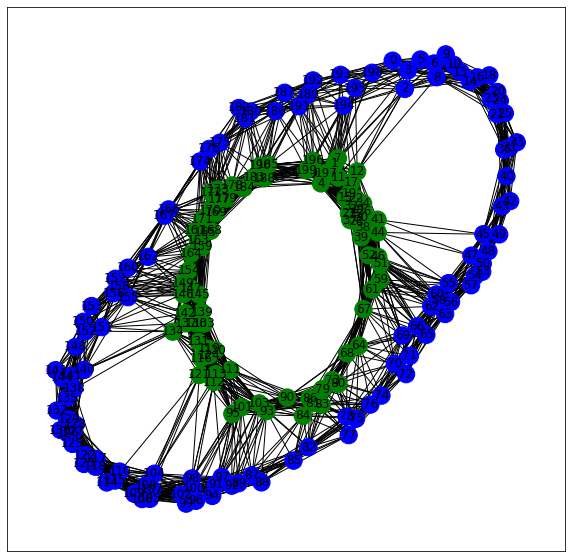

In [37]:
print_graph(similarity_X, clusters=clusters_X[2]["Threshold method"], threshold=0.1, circular_layout=False, random_state=5)

**X: K-means**

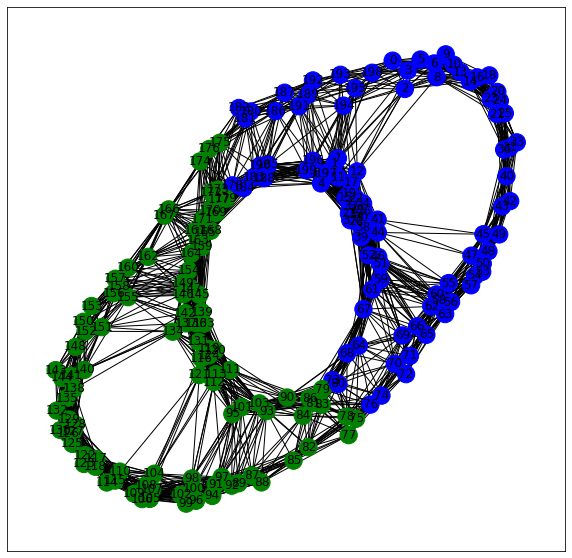

In [38]:
print_graph(similarity_X, clusters=clusters_X[2]["K-means"], threshold=0.1, circular_layout=False, random_state=5)

**X: EM algorithm**

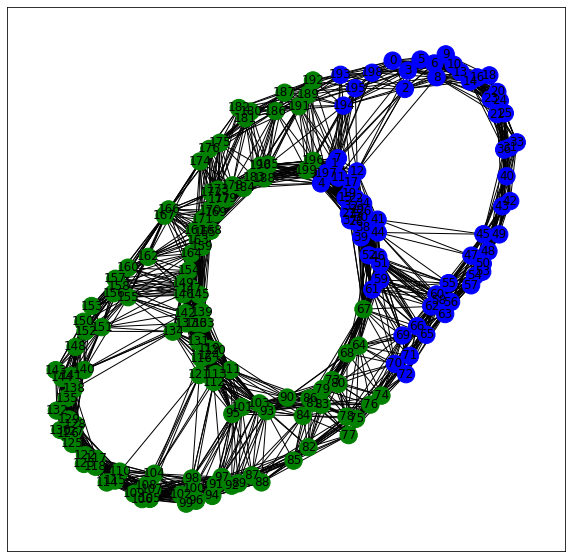

In [39]:
print_graph(similarity_X, clusters=clusters_X[2]["EM algorithm"], threshold=0.1, circular_layout=False, random_state=5)

**X: Spectral algorithm**

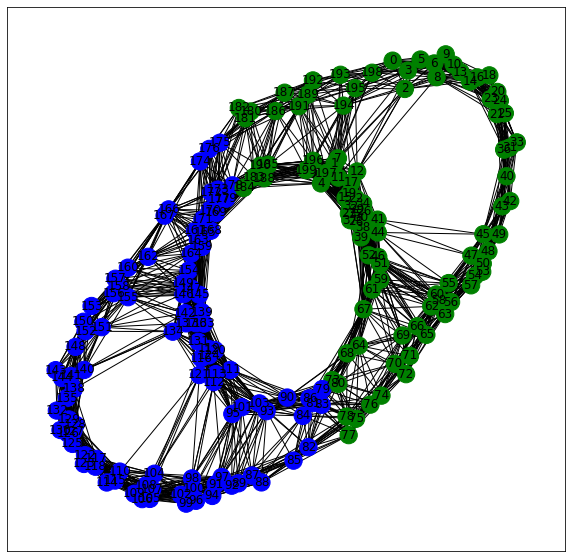

In [40]:
print_graph(similarity_X, clusters=clusters_X[2]["Spectral algorithm"], threshold=0.1, circular_layout=False, random_state=5)

**Y: Threshold method**

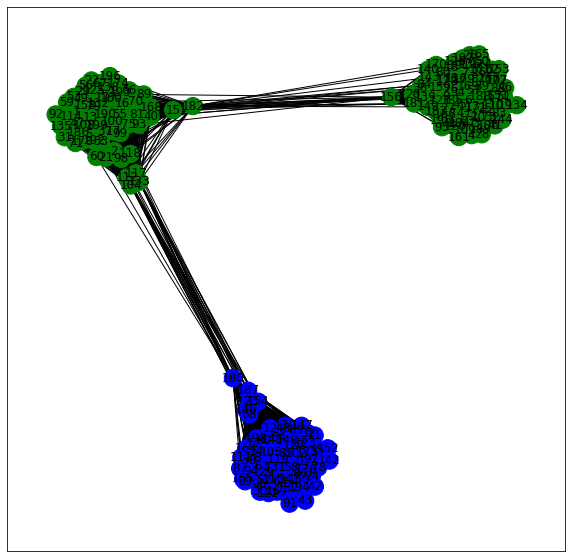

In [41]:
print_graph(similarity_Y, clusters=clusters_Y[2]["Threshold method"], threshold=0.65, circular_layout=False, random_state=42)

**Y: K-means**

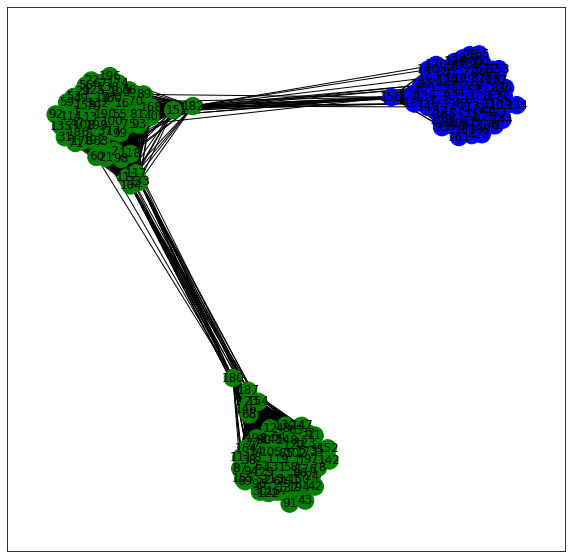

In [42]:
print_graph(similarity_Y, clusters=clusters_Y[2]["K-means"], threshold=0.65, circular_layout=False, random_state=42)

**Y: EM algorithm**

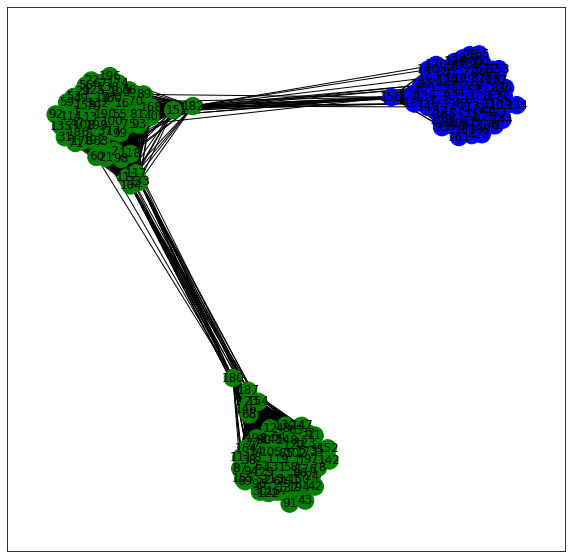

In [43]:
print_graph(similarity_Y, clusters=clusters_Y[2]["EM algorithm"], threshold=0.65, circular_layout=False, random_state=42)

**Y: Spectral algorithm**

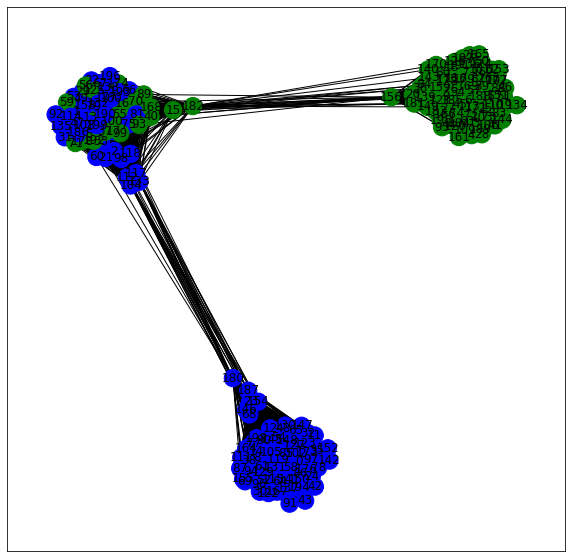

In [44]:
print_graph(similarity_Y, clusters=clusters_Y[2]["Spectral algorithm"], threshold=0.65, circular_layout=False, random_state=42)

### Выводы о возможности разбиения на два кластера

* Для данных из X разбиение на два кластера оказалось вполне приемлемым, значение модулярности для всех методов принимает значение в районе 0.4. Вершины разбиваются почти одинаково на два кластера (будто простым делением пополам) в K-means, EM, Spectral алгоритмах. Но стоит отметить метод отсечений, что при взятии надлежащего порога смог выделить две группы, напоминающих эллипсы (один из которых "вложен" в другой).
* Для данных из Y же разбиение на два кластера оказалось менее качественным, модулярность для всех алгоритмов составляем все лишь ~0.25. И по графикам видно, что одна часть данных (буквально треть ~ третий кластер) переходит от одного кластера к другому в зависимости от рассматриваемого алгоритма, в спектральном методе эта часть вообще была частично разделена между двумя группами.

# Кластеризация для числа кластеров k=3

### - Threshold method:

In [45]:
# считаем кластера по методу отсечений
clusters_X[3]["Threshold method"] = threshold(adj_matrix=similarity_X, clusters_num=3)

# аналогично для данных из Y
clusters_Y[3]["Threshold method"] = threshold(adj_matrix=similarity_Y, clusters_num=3)

In [46]:
clusters_X[3]["Threshold method"] # пример разбиения данных X на три кластера методом отсечений

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
 0, 1], dtype=int32)

### - K-means

In [47]:
# обучение K-means моделей
clusters_X[3]["K-means"] = KMeans(n_clusters=3, # ожидаемое число кластеров
                                  max_iter=300, # максимальное число итераций K-means для одного запуска
                                  random_state=0, # случайное число для инициализации центроидов (centroid)
                                  n_init="auto" # число запусков k-means с различными centroid seeds для нахождения лучшего
                                 ).fit_predict(data_X) # обучаем на данных и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[3]["K-means"] = KMeans(n_clusters=3, # ожидаемое число кластеров
                                  max_iter=300, # максимальное число итераций K-means для одного запуска
                                  random_state=0, # случайное число для инициализации центроидов (centroid)
                                  n_init="auto" # число запусков k-means с различными centroid seeds для нахождения лучшего
                                 ).fit_predict(data_Y) # обучаем на данных и предсказываем их кластера

In [48]:
clusters_X[3]["K-means"] # пример разбиения данных X на три кластера методом K-means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
 2, 2], dtype=int32)

### - EM алгоритм

In [49]:
# обучение EM моделей
clusters_X[3]["EM algorithm"] = GaussianMixture(n_components=3, # ожидаемое число кластеров
                                                covariance_type="full", # тип используемых ковариационных параметров
                                                max_iter=300, # максимальное число итераций K-means для одного запуска
                                                init_params="random_from_data", # метод, используемый для инициализации весов, средних значений и точности
                                                random_state=42, # случайное число для инициализации центроидов (centroid)
                                               ).fit_predict(data_X) # обучаем на данных и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[3]["EM algorithm"] = GaussianMixture(n_components=3, # ожидаемое число кластеров
                                                covariance_type="full", # тип используемых ковариационных параметров
                                                max_iter=300, # максимальное число итераций K-means для одного запуска
                                                init_params="random_from_data", # метод, используемый для инициализации весов, средних значений и точности
                                                random_state=42, # случайное число для инициализации центроидов (centroid)
                                               ).fit_predict(data_Y) # обучаем на данных и предсказываем их кластера

In [50]:
clusters_X[3]["EM algorithm"] # пример разбиения данных X на три кластера методом EM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1])

### - Spectral algorithm

In [51]:
# обучение Spectral моделей
clusters_X[3]["Spectral algorithm"] = SpectralClustering(n_components=3, # ожидаемое число кластеров
                                                         assign_labels='cluster_qr', # стратегия назначения меток элементам в пространстве
                                                         affinity="precomputed", # интерпретировать ли входные данные как заранее вычисленную матрицу сходства, где большие значения указывают на большее сходство между экземплярами
                                                         random_state=0, # случайное число для инициализации центроидов (centroid)
                                                        ).fit_predict(similarity_X) # обучаем на данных (матрица близости) и предсказываем их кластера

# аналогично для данных из Y
clusters_Y[3]["Spectral algorithm"] = SpectralClustering(n_components=3, # ожидаемое число кластеров
                                                         assign_labels='cluster_qr', # стратегия назначения меток элементам в пространстве
                                                         affinity="precomputed", # интерпретировать ли входные данные как заранее вычисленную матрицу сходства, где большие значения указывают на большее сходство между экземплярами
                                                         random_state=0, # случайное число для инициализации центроидов (centroid)
                                                        ).fit_predict(similarity_Y) # обучаем на данных (матрица близости) и предсказываем их кластера

In [52]:
clusters_X[3]["Spectral algorithm"] # пример разбиения данных X на три кластера методом Spectral algorithm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
 1, 1])

## 2) Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса (вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

In [53]:
# создаём пустой DataFrame под значения RAND индексов (для данных из X с числом кластеров = 3)
rand_indices_3_X = pd.DataFrame(columns = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # колонки таблицы
                                index = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                                dtype=np.float64) # тип данных
                              
rand_indices_3_Y = pd.DataFrame(columns = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # колонки таблицы
                                index = ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                                dtype=np.float64) # тип данных

for alg1_name in ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"]: # идём по названиям методов кластеризации (столбцам)
    for alg2_name in ["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"]: # идём по названиям методов кластеризации (строкам)
        rand_indices_3_X[alg1_name][alg2_name] = rand_score(clusters_X[3][alg1_name], clusters_X[3][alg2_name]) # считаем RAND индекс для данных из X при использовании алгоритмов alg1_name и alg2_name
        rand_indices_3_Y[alg1_name][alg2_name] = rand_score(clusters_Y[3][alg1_name], clusters_Y[3][alg2_name]) # считаем RAND индекс для данных из Y при использовании алгоритмов alg1_name и alg2_name

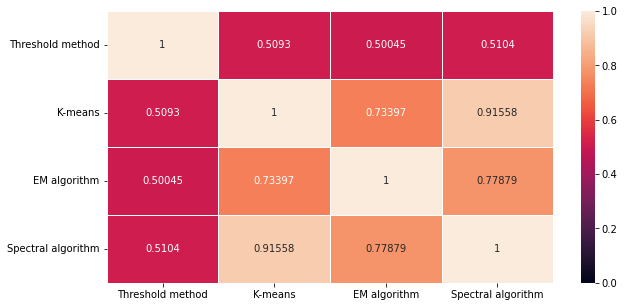

In [54]:
plt.figure(figsize=(10,5)) # задаём размер вывода
sns.heatmap(rand_indices_3_X, linewidths=1, annot=True, vmin=0, vmax=1, fmt='.5g') # делаем heatmap из таблицы
# linewidths - длина разделяющей ячейки таблицы линии 
# annot - добавление подписи в ячейку (значение RAND index)
# vmin, vmax - диапазон значений RAND index [vmin, vmax]
# fmt - число знаков после запятой у float

# plt.xticks(rotation=45, horizontalalignment='right') # поворачиваем подписи по X и выравниваем (я хотю чтобы это было туть)
plt.show() # вывод графика

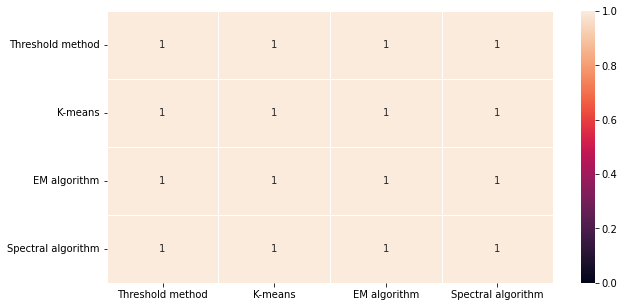

In [55]:
plt.figure(figsize=(10,5)) # задаём размер вывода
sns.heatmap(rand_indices_3_Y, linewidths=1, annot=True, vmin=0, vmax=1, fmt='.5g') # делаем heatmap из таблицы
# linewidths - длина разделяющей ячейки таблицы линии 
# annot - добавление подписи в ячейку (значение RAND index)
# vmin, vmax - диапазон значений RAND index [vmin, vmax]
# fmt - число знаков после запятой у float

# plt.xticks(rotation=45, horizontalalignment='right') # поворачиваем подписи по X и выравниваем (я хотю чтобы это было туть)
plt.show() # вывод графика

* Для данных X разбиения полученные с помощью алгоритмов K-means, EM, Spectral имеют очень близкий RAND index, что может свидетельствовать о схожести разбиений этими методами. Метод отсечений (threshold) же стоит особняком и отличается на 0.5 по RAND index от всех других алгоритмов.
* Для данных Y разбиения методам отсечений, K-means, EM, Spectral получились совершенно одинаковыми, все четыре алгоритма сошлись к одному и тому же кластерному разбиению.

## 3) Вычислить значение функции модулярности для каждого разбиения на 3 кластера из п.1.

In [56]:
# создаём DataFrame под модулярность для X
modularity_3_X = pd.DataFrame(columns=["Modularity"], # колонки таблицы
                              index=["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                              dtype=np.float64) # тип данных

# аналогично для Y
modularity_3_Y = pd.DataFrame(columns=["Modularity"], # колонки таблицы
                              index=["Threshold method", "K-means", "EM algorithm", "Spectral algorithm"], # строки таблицы
                              dtype=np.float64) # тип данных

for alg_name in modularity_3_X.index: # идём по типу алгоритма
    modularity_3_X["Modularity"][alg_name] = get_modularity(similarity_X, clusters_X[3][alg_name]) # считаем модулярность для X
    modularity_3_Y["Modularity"][alg_name] = get_modularity(similarity_Y, clusters_Y[3][alg_name]) # считаем модулярность для Y

In [57]:
modularity_3_X # модулярность для данных X при разбиении на 3 кластера

,Modularity
Threshold method,0.402689
K-means,0.552673
EM algorithm,0.534026
Spectral algorithm,0.556265


In [58]:
modularity_3_Y # модулярность для данных Y при разбиении на 3 кластера

,Modularity
Threshold method,0.311698
K-means,0.311698
EM algorithm,0.311698
Spectral algorithm,0.311698


## 4) Сделать общие выводы по возможности разбиения на 3 кластера каждого набора данных.

### Вывод получившихся разбиений на три кластера

**X: Threshold method**

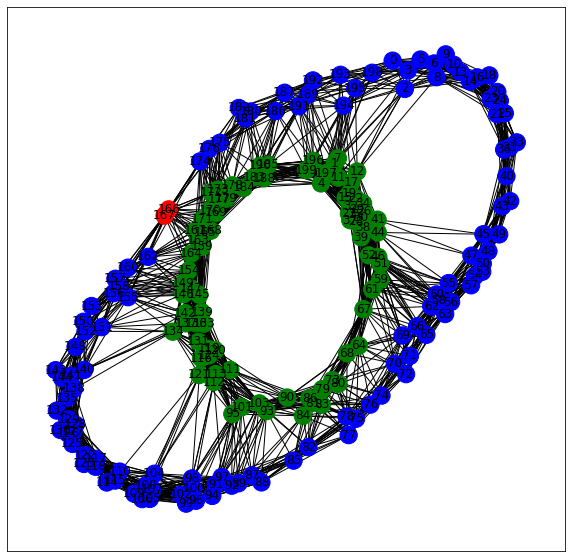

In [59]:
print_graph(similarity_X, clusters=clusters_X[3]["Threshold method"], threshold=0.1, circular_layout=False, random_state=5)

**X: K-means**

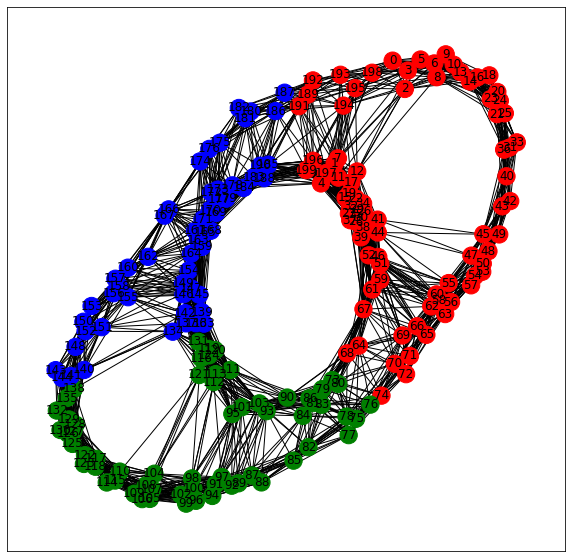

In [60]:
print_graph(similarity_X, clusters=clusters_X[3]["K-means"], threshold=0.1, circular_layout=False, random_state=5)

**X: EM algorithm**

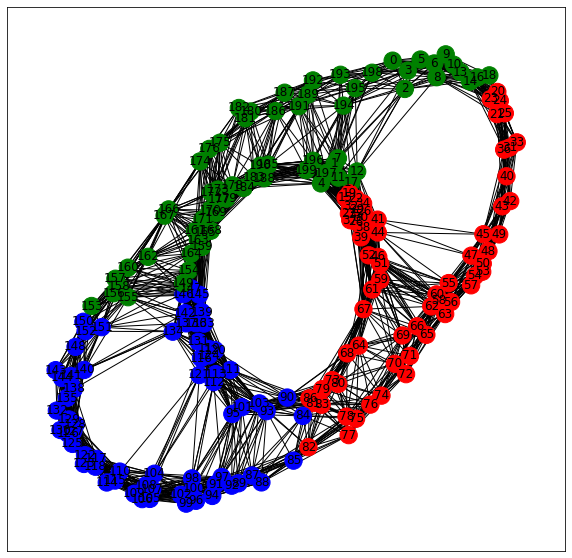

In [61]:
print_graph(similarity_X, clusters=clusters_X[3]["EM algorithm"], threshold=0.1, circular_layout=False, random_state=5)

**X: Spectral algorithm**

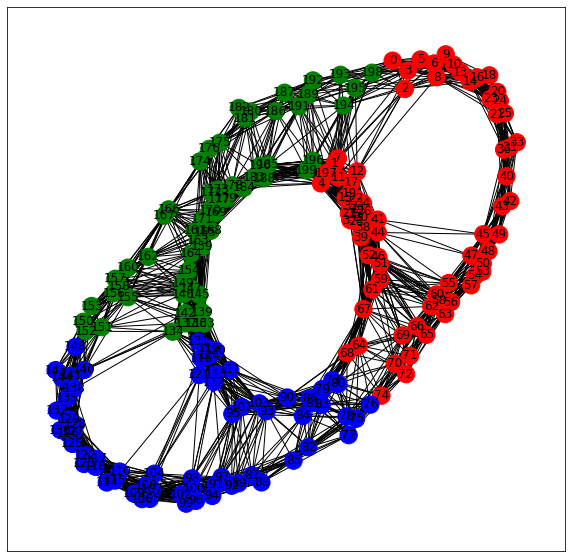

In [62]:
print_graph(similarity_X, clusters=clusters_X[3]["Spectral algorithm"], threshold=0.1, circular_layout=False, random_state=5)

**Y: Threshold method**

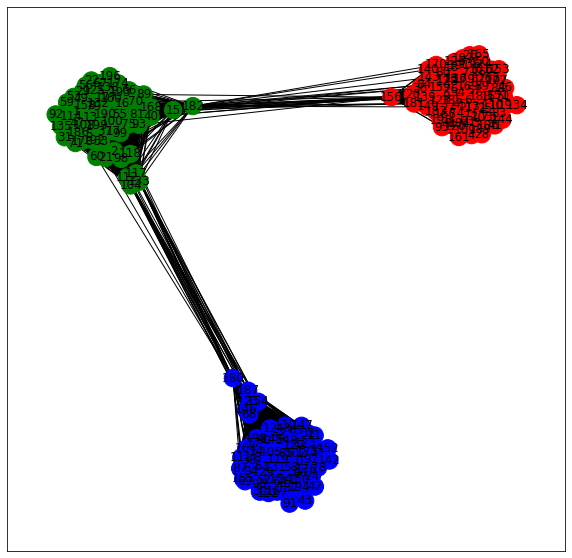

In [63]:
print_graph(similarity_Y, clusters=clusters_Y[3]["Threshold method"], threshold=0.65, circular_layout=False, random_state=42)

**Y: K-means**

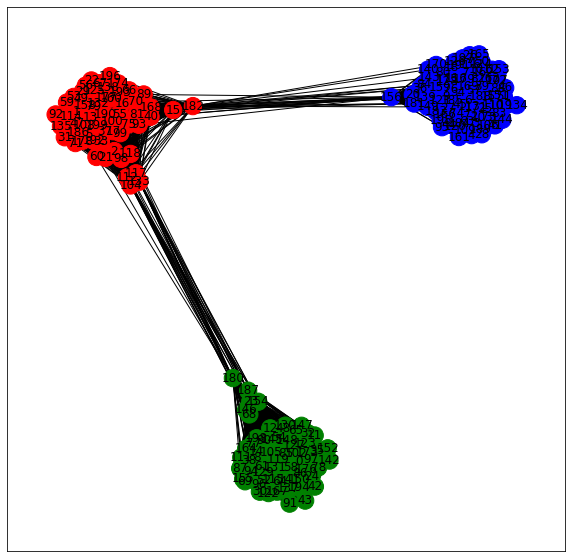

In [64]:
print_graph(similarity_Y, clusters=clusters_Y[3]["K-means"], threshold=0.65, circular_layout=False, random_state=42)

**Y: EM algorithm**

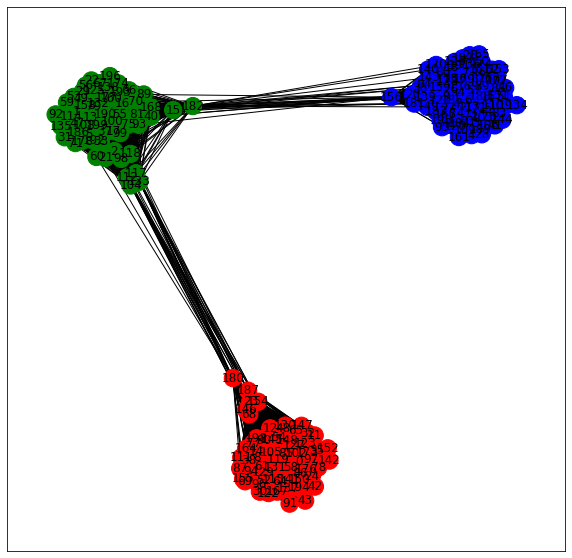

In [65]:
print_graph(similarity_Y, clusters=clusters_Y[3]["EM algorithm"], threshold=0.65, circular_layout=False, random_state=42)

**Y: Spectral algorithm**

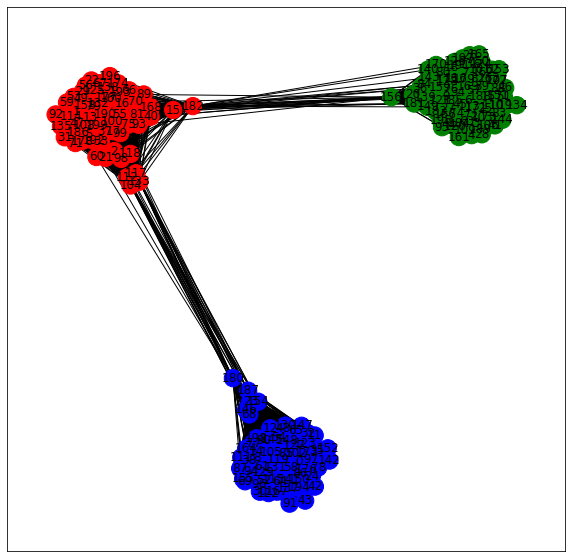

In [66]:
print_graph(similarity_Y, clusters=clusters_Y[3]["Spectral algorithm"], threshold=0.65, circular_layout=False, random_state=42)

### Выводы о возможности разбиения на три кластера

* Для данных X метод отсечений продемонстрировал всю суть иерархических алгоритмов, создав новый кластер всего лишь из пары вершин, что одинаково сильно удалены от двух других кластеров (при этом сохранив их эллиптический вид, полученный ещё при кластеризации на 2 кластера). Оставшиеся алгоритмы почти равноразмерно попытались разрезать данные на три части, вышло у них это примерно одинаково, модулярность при этом поднялась с 0.4 до 0.55. Однако, субъективно — лучшее разбиение этих данных было получено ещё при делении на два кластера методом отсечений.
* Для данных Y все алгоритмы пришли к одному и тому же оптимальному распределению на кластеры. Модулярность такого разбиения увеличилась лишь с 0.25 до 0.31, хотя эмпирически видно, что данные разделены лучше, чем при двух кластерах.

**Эмпирически: разбиение на три кластера для данных X стало хуже, а для Y — лучше.**


**По модулярности: разбиение на три группы лучше как для X, так и для Y.**

# Общий случай

## 1) Предложите (или найдите готовый) способ определения возможного числа кластеров в данных. Примените этот способ к каждому из заданных наборов данный. Сравните с вашими результатами в п.4 для k=2 и п.4 для k=3

Для определения возможного числа кластеров в данных воспользуемся графиком-дендрограммой, показывающей степень близости отдельных объектов и кластеров, а также наглядно демонстрирующей в графическом виде последовательность их объединения или разделения. По оси Y откладывается расстояние между объектами в пространстве признаков.

In [139]:
# проведение иерархической агломеративной кластеризации
link_X = linkage(data_X,
                 method="ward", # метод для подсчёта расстояния между двумя кластерами 
                 metric="euclidean") # метрика для измерения расстояния между кластерами, используемая в method
# создание DataFrame для наглядности
link_X = pd.DataFrame(link_X,
                      columns=["Cluster 1", "Cluster 2", "Dist", "Number of elements"], # столбцы DataFrame
                      index=[f"step {i+1}" for i in range(link_X.shape[0])]) # строки DataFrame
# Cluster 1 - первый кластер в объединении
# Cluster 2 - второй кластер в объединении
# Dist - расстояние между объединяемыми кластерами
# Number of elements - число элементов в общем кластере после объединения

# аналогично для данных Y
link_Y = linkage(data_Y,
                 method="ward", # метод для подсчёта расстояния между двумя кластерами 
                 metric="euclidean") # метрика для измерения расстояния между кластерами, используемая в method

link_Y = pd.DataFrame(link_Y,
                      columns=["Cluster 1", "Cluster 2", "Dist", "Number of elements"], # столбцы DataFrame
                      index=[f"step {i+1}" for i in range(link_X.shape[0])]) # строки DataFrame

In [140]:
link_X.head(5) # пример вывода шагов объединения

,Cluster 1,Cluster 2,Dist,Number of elements
step 1,26.0,35.0,0.030916,2.0
step 2,112.0,113.0,0.037620,2.0
step 3,1.0,7.0,0.038344,2.0
step 4,30.0,37.0,0.040439,2.0
step 5,31.0,36.0,0.043521,2.0


### Дендрограмма для X

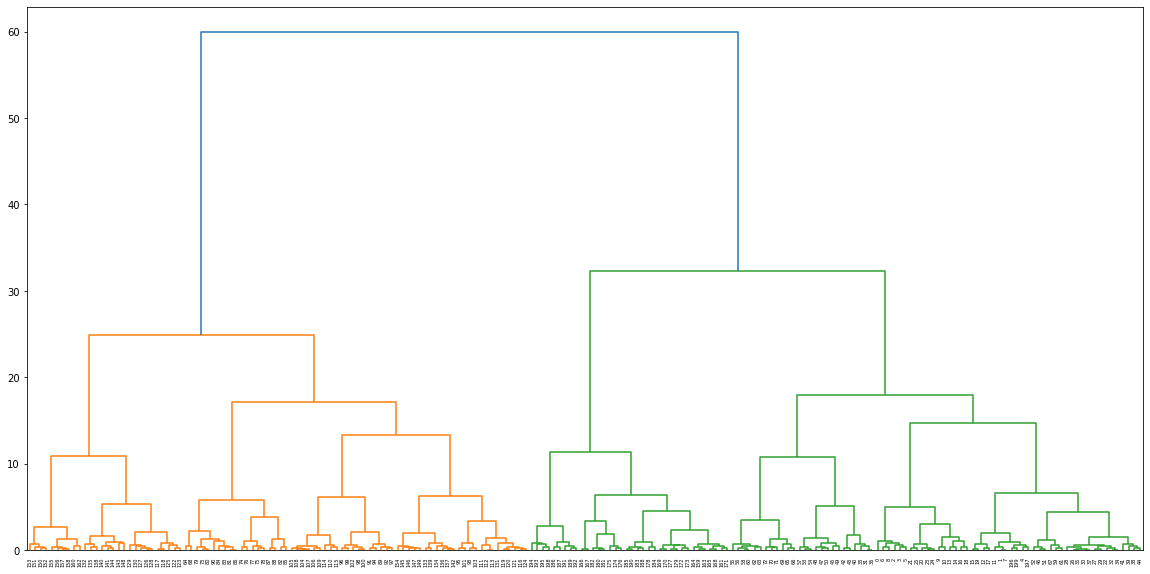

In [141]:
plt.figure(figsize=(20,10)) # задание размера графика
dendrogram_X = dendrogram(link_X) # строим дендрограмму
plt.show() # выводим график

* Для X можно заметить, что объединение вплоть до двух кластеров идёт довольно активно (относительно объединения в один кластер, где расстояние между кластерами буквально в два раза больше всех предыдущих), что согласуется с результатами, полученными при кластеризации на две групы.

### Дендрограмма для Y

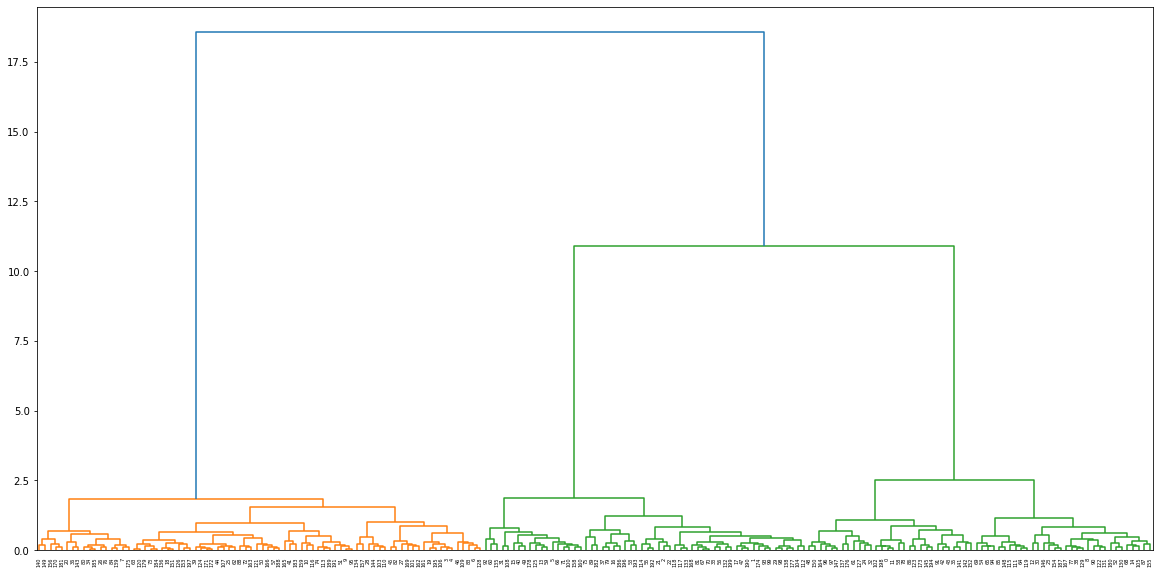

In [142]:
plt.figure(figsize=(20,10)) # задание размера графика
dendrogram_X = dendrogram(link_Y) # строим дендрограмму
plt.show() # выводим график

* Для Y разбиение на три группы хорошо прослеживается по дендрограмме, все элементы в таких кластерах находятся близко друг к другу. Чтобы же получить меньшее число кластеров — требуется объединять элементы на сильно большем расстоянии, из-за чего происходит ухудшение метрик. Такие результаты совпадают с тем, что было получено в п. 4 на предыдущих шагах.

## 2) Предложите (или найдите в литературе) какой-либо другой критерий качества кластеризации (отличный от модулярности). Сравните разбиения п.1 для k=2 и п.1 для k=3 по этому критерию. Дайте комментарий, как это согласуется с вашими выводами п.4 для k=2 и п.4 для k=3

Дополнительный критерий для оценки качества разбиений — коэффициент силуэта.

Коэффициент силуэта показывает, насколько каждый объект «похож» на другие объекты в том кластере, в который он был распределён в процессе кластеризации, и «не похож» на объекты из других кластеров.

$$
coef_{silhouette} = \dfrac{1}{n} \sum_{i=1}^{n} \dfrac{b_i-a_i}{max(a_i,b_i)},\ где\newline
a_i\ —\ среднее\ расстояние\ между\ объектом\ i\ и\ другими\ точками\ в\ том\ же\ кластере\newline
b_i\ —\ среднее\ расстояние\ между\ объектом\ i\ и\ другими\ точками\ в\ следующем\ ближайшем\ кластере
$$

Коэффициент силуэта определён в области *[-1, 1]*:
* -1 — неправильная кластеризация
* ~0 — перекрывающаяся/пересекающаяся кластеризация
*  1 — плотная (качественная) кластеризация

Чем кластера плотнее и дальше отделены между собой, тем выше коэффициент силуэта.

Минусом такого коэффициента является то, что он выше для выпуклых кластеров, чем для других концепций кластеров (таких как кластеры на основе плотности).

In [147]:
for alg_name in ("Threshold method", "K-means", "EM algorithm", "Spectral algorithm"): # идём по названиям алгоритмов
    for clusters in (2, 3): # идём по числу рассматриваемых кластеров
        print(f'Метод "{alg_name}", число кластеров {clusters} - {silhouette_score(distance_X, clusters_X[clusters][alg_name], metric="euclidean")}') # считаем и выводим коэффициент силуэта

Метод "Threshold method", число кластеров 2 - 0.12199787748823523
Метод "Threshold method", число кластеров 3 - -0.06390023801393507
Метод "K-means", число кластеров 2 - 0.46482134840053824
Метод "K-means", число кластеров 3 - 0.36459153258748633
Метод "EM algorithm", число кластеров 2 - 0.4242055821698948
Метод "EM algorithm", число кластеров 3 - 0.31835620587353586
Метод "Spectral algorithm", число кластеров 2 - 0.46398546731877266
Метод "Spectral algorithm", число кластеров 3 - 0.3450781673438381


In [148]:
for alg_name in ("Threshold method", "K-means", "EM algorithm", "Spectral algorithm"): # идём по названиям алгоритмов
    for clusters in (2, 3): # идём по числу рассматриваемых кластеров
        print(f'Метод "{alg_name}", число кластеров {clusters} - {silhouette_score(distance_Y, clusters_Y[clusters][alg_name], metric="euclidean")}') # считаем и выводим коэффициент силуэта

Метод "Threshold method", число кластеров 2 - 0.6254207904985476
Метод "Threshold method", число кластеров 3 - 0.7995072182610091
Метод "K-means", число кластеров 2 - 0.6583208209796712
Метод "K-means", число кластеров 3 - 0.7995072182610091
Метод "EM algorithm", число кластеров 2 - 0.6583208209796712
Метод "EM algorithm", число кластеров 3 - 0.7995072182610091
Метод "Spectral algorithm", число кластеров 2 - 0.5502434778737186
Метод "Spectral algorithm", число кластеров 3 - 0.7995072182610091


### Вывод

* Согласно коэффициенту силуэта для данных X лучше всего подходит разбиение на два кластера во всех методах (в Threshold method его значение мало, так как кластера там получились не выпуклые). Такие же выводы были получены при эмпирическом анализе кластеризаций на предыдущих шагах.
* Для Y же наблюдается противоположная ситуация — эти данные значительно лучше разбивать на 3 кластера (коэффициент силуэта больше на ~0.15, чем при разбиении на 2), что опять же сходится с сделанными ранее выводами.